### Nonlinear learning rule capacity

In [14]:
import sys
import os
from tqdm import tqdm
import numpy as np
import scipy
from scipy.stats import norm
from scipy.special import erf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.legend as mlegend

In [15]:
directory = "data"
data_arr = []
def load_data(filepath):
    d = np.load(open(filepath, 'rb'), allow_pickle=True)
    return d.item()
for file in tqdm(os.listdir(directory)):
    if file.endswith(".npy"):
        filepath = os.path.join(directory, file)
        data_arr.append(load_data(filepath))
data = dict()
for d in data_arr:
    key1 = d['x_f']
    key2 = d['theta_0']
    key3 = d['E_x_f']
    key4 = d['criterion_threshold']
    key5 = d['N']
    data[tuple([key1, key2, key3])] = d
keys1 = sorted(np.unique([k[0] for k in data.keys()]))
keys2 = sorted(np.unique([k[1] for k in data.keys()]))
keys3 = sorted(np.unique([k[2] for k in data.keys()]))

100%|██████████| 252/252 [00:00<00:00, 1672.89it/s]


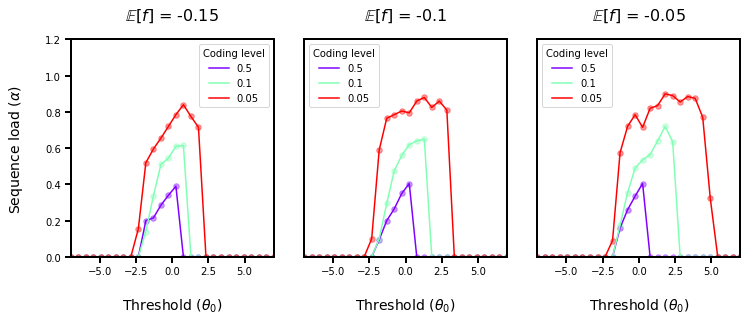

In [17]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

import matplotlib
cmap = matplotlib.cm.get_cmap("rainbow")
colors = [cmap(x) for x in np.linspace(0.0,1.0,len(keys1))]

for n in range(3):
    for m, k1 in enumerate(keys1):
        key = []
        x = []
        y = []
        for k2 in keys2:
            try:
                d = data[(k1,k2,keys3[n])]
                N = d['N']
                if d['P_final'] == 0:
                    alpha = 0
                else:
                    alpha = (d['P_final']+16)/200.
                if np.isnan(alpha):
                    alpha = 0
                c = 0.005 
                errcode = d['errcode']
                if errcode != 0:
                    print(k1, k2, P, errcode)
                x.append(k2)
                y.append(alpha)
            except:
                pass
            
        ax[n].scatter(x, y, color=colors[m], s=30, alpha=0.4)
        ax[n].plot(x, y, color=colors[m], label=np.around(1-norm.cdf(k1),2))
        ax[n].set_xlim([-7, 7])
        ax[n].set_ylim([0,1.2]);
        
for n, axis in enumerate(ax):
    if n == 0:
        axis.set_ylabel(r"Sequence load ($\alpha$)", fontsize=14, labelpad=20);
    axis.set_xlabel(r"Threshold ($\theta_0$)", fontsize=14, labelpad=20);
    axis.legend(title=r"Coding level");
    axis.tick_params(direction='out', length=6, width=2)
    for dr in ['top','bottom','left','right']:
        axis.spines[dr].set_linewidth(2.0)
    
ax[1].set_yticks([]);
ax[2].set_yticks([]);
ax[0].set_title("$\mathbb{E}[f]$ = -0.15", fontsize=16, pad=20);
ax[1].set_title("$\mathbb{E}[f]$ = -0.1", fontsize=16, pad=20);
ax[2].set_title("$\mathbb{E}[f]$ = -0.05", fontsize=16, pad=20);
plt.subplots_adjust(wspace=0.15)
plt.savefig('../output/10.pdf', bbox_inches='tight')